In [7]:
from collections.abc import Sequence
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
import pandas as pd
import shutil
import os

#Function definitions for categorical columns encoding and normalizing numeric features.
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd



In [8]:
import pandas as pd
path = "./data/"

filename_read = os.path.join(path,"heart_disease.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

#Dropping any row with missing values
df.dropna(inplace=True)
#df

#Dropping Duplicates
df.drop_duplicates(inplace=True)
#df
#Encoding categorical features(One hot encoding)
encode_text_dummy(df,'sex')
encode_text_dummy(df,'chest pain type')
encode_text_dummy(df,'fasting blood sugar')
encode_text_dummy(df,'resting ecg')
encode_text_dummy(df,'exercise angina')
encode_text_dummy(df,'ST slope')

#Normalizing the numeric features
encode_numeric_zscore(df,'age')
encode_numeric_zscore(df,'resting bp s')
encode_numeric_zscore(df,'cholesterol')
encode_numeric_zscore(df,'max heart rate')
encode_numeric_zscore(df,'oldpeak')

df



,age,resting bp s,cholesterol,max heart rate,oldpeak,target,sex-0,sex-1,chest pain type-1,chest pain type-2,...,fasting blood sugar-1,resting ecg-0,resting ecg-1,resting ecg-2,exercise angina-0,exercise angina-1,ST slope-0,ST slope-1,ST slope-2,ST slope-3
0,-1.432359,0.410685,0.824621,1.382175,-0.831979,0,False,True,False,True,...,False,True,False,False,True,False,False,True,False,False
1,-0.478223,1.490940,-0.171867,0.753746,0.105606,1,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
2,-1.750404,-0.129442,0.769768,-1.524307,-0.831979,0,False,True,False,True,...,False,False,True,False,True,False,False,True,False,False
3,-0.584238,0.302660,0.138964,-1.131539,0.574398,1,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
4,0.051853,0.950812,-0.034736,-0.581664,-0.831979,0,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,-0.902283,-1.209697,0.596068,-0.188897,0.293123,1,False,True,True,False,...,False,True,False,False,True,False,False,False,True,False
1186,1.536064,0.626736,-0.053020,0.164595,2.355810,1,False,True,False,False,...,True,True,False,False,True,False,False,False,True,False
1187,0.369898,-0.129442,-0.619830,-0.856602,0.293123,1,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
1188,0.369898,-0.129442,0.340090,1.460728,-0.831979,1,True,False,False,True,...,False,False,False,True,True,False,False,False,True,False


In [9]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.utils.class_weight import compute_class_weight

# Split into train and test
y= df['target']
x=df.drop('target',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

#compute_class_weight()

#C - regularization parameter, it basically gives the penalty of 1 if a point is in wrong hyperplane 
model = svm.SVC(kernel='linear', C=1)
model.fit(x_train, y_train)

y_pred=model.predict(x_test)
print(y_pred)

[0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1
 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1
 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0
 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1
 1 0 1 0 1 1 0 0]


accuracy is  0.8608695652173913
F1 Score: 0.875
Recall: 0.8484848484848485
Precision: 0.9032258064516129
ROC AUC Score: 0.8630179344465059


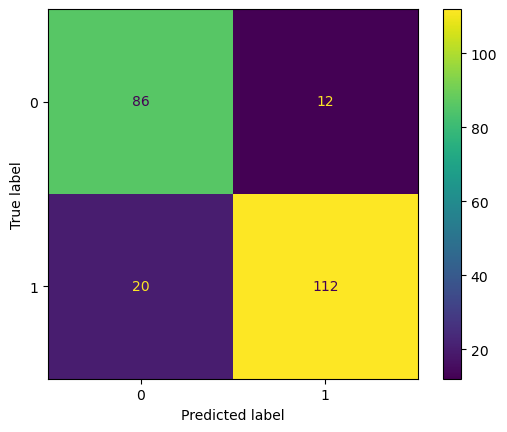

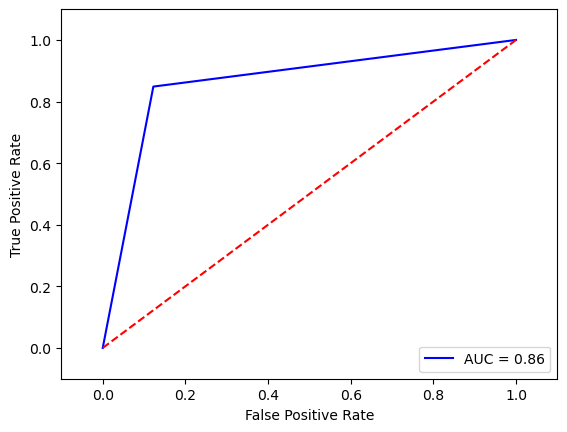

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        98
           1       0.90      0.85      0.88       132

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



In [10]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc, recall_score, precision_score, confusion_matrix,  ConfusionMatrixDisplay, classification_report
from sklearn import metrics

# Calculate the Accuracy
accuracy=metrics.accuracy_score(y_test,y_pred)
print("accuracy is ", accuracy)

# Calculate the F1 score
f1score= f1_score(y_test, y_pred)
print("F1 Score:", f1score)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate the precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
plt.show()


# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print(classification_report(y_test, y_pred))